In [418]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
import random
import sklearn.ensemble

In [2]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X,Y = ml.shuffleData(X,Y)

In [375]:
Xtrue = np.genfromtxt('data/X_test.txt', delimiter=None)

# Random Forests

In [ ]:
Xtr,Xte,Ytr,Yte = ml.splitData(X,Y,0.5)

In [427]:
learner = sklearn.ensemble.RandomForestClassifier(n_estimators=1000)
learner.fit(Xtr,Ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [428]:
print(learner.score(Xtr,Ytr))
print(learner.score(Xte,Yte))

0.97497
0.71196


In [441]:
learnerf2,learnerf3,learnerf5,learnerf7,learnerf9,learnerf11 = sklearn.ensemble.RandomForestClassifier(max_features = 2),sklearn.ensemble.RandomForestClassifier(max_features = 3),sklearn.ensemble.RandomForestClassifier(max_features = 5),sklearn.ensemble.RandomForestClassifier(max_features = 7),sklearn.ensemble.RandomForestClassifier(max_features = 9),sklearn.ensemble.RandomForestClassifier(max_features = 11)
learnerf2.fit(Xtr,Ytr)
learnerf3.fit(Xtr,Ytr)
learnerf5.fit(Xtr,Ytr)
learnerf7.fit(Xtr,Ytr)
learnerf9.fit(Xtr,Ytr)
learnerf11.fit(Xtr,Ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=11,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

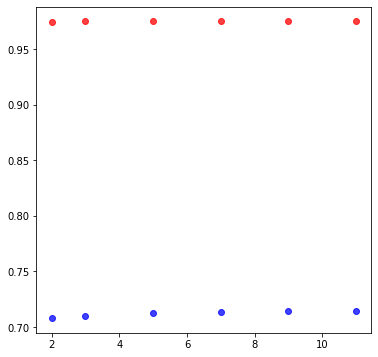

In [443]:
featureList = [learnerf2,learnerf3,learnerf5,learnerf7,learnerf9,learnerf11]
x_values = [2,3,5,7,9,11]
f, ax = plt.subplots(1, 1, figsize=(6, 6))
for x in range(len(x_values)):
    ax.plot(x_values[x],featureList[x].score(Xtr,Ytr),'ro',alpha=.75)
    ax.plot(x_values[x],featureList[x].score(Xte,Yte),'bo',alpha=.75)

plt.show()

In [445]:
learner1000_f9 = sklearn.ensemble.RandomForestClassifier(n_estimators = 1000, max_features = 9)
learner1000_f9.fit(Xtr,Ytr)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [453]:
finalLearner = sklearn.ensemble.RandomForestClassifier(n_estimators = 1000, max_features = 9)
finalLearner.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=9,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# Summary

In [455]:
print("Final results:")
print("\tTraining Error:", learner1000_f9.score(Xtr,Ytr))
print("\tTesting Error:", learner1000_f9.score(Xte,Yte))
print("\tLeaderboard Score:", 0.65549)

Final results:
	Training Error: 0.97497
	Testing Error: 0.71652
	Leaderboard Score: 0.65549


In [461]:
def auc(m, X, Y):
        """Compute the area under the roc curve on the given test data.

        Args:
        X (arr): M,N array of M data points with N features each
        Y (arr): M, or M,1 array of target class values for each data point

        Returns:
        float: Area under the ROC curve

        This method only works on binary classifiers.
        """

        soft = m.predict_proba(X)  # p(class = 2nd)
        soft=soft[:,1]
        print(soft[0:10])
        print(Y[0:10])
        indices = np.argsort(soft)         # sort data by score value
        Y = Y[indices]
        sorted_soft = soft[indices]

        # compute rank (averaged for ties) of sorted data
        dif = np.hstack( ([True],np.diff(sorted_soft)!=0,[True]) )
        r1  = np.argwhere(dif).flatten()
        r2  = r1[0:-1] + 0.5*(r1[1:]-r1[0:-1]) + 0.5
        rnk = r2[np.cumsum(dif[:-1])-1]

        # number of true negatives and positives
        n0,n1 = sum(Y == 0), sum(Y == 1)

        if n0 == 0 or n1 == 0:
            raise ValueError('Data of both class values not found')

        # compute AUC using Mann-Whitney U statistic
        result = (np.sum(rnk[Y == 1]) - n1 * (n1 + 1.0) / 2.0) / n1 / n0
        return result

In [464]:
print(auc(finalLearner,Xtr,Ytr))

[0.81475833 0.163      0.09975    0.11915    0.902      0.86243333
 0.755      0.         0.03675    0.262     ]
[1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
0.9962726079203225


In [465]:
print(auc(finalLearner,Xte,Yte))

[0.9725     0.528875   0.904      0.63758333 0.90446667 0.73631667
 0.06075    0.83416667 0.001      0.06      ]
[1. 0. 1. 1. 1. 1. 0. 1. 0. 0.]
0.9935238709199952


In using random forests, I wanted to make sure there was as much diversity in each tree so that when averaged together,
there would be one classification that was low bias, in addition to the apparent high variance in each classification tree.
These ideas heavily influenced the parameters I used to classify the data. I went with Sci-Kit and used their random forest library. This ensured that when given k trees, the training data would randomly be sampled for each tree. I also added a classification of 9 features. Random sampling and feature selection, combined, helped to reduce bias since
each tree can be vastly different from each other.

In addition, I also omitted max depth which ensured a very flexible class of functions. I knew that with random forests,
overfitting wouldn't be that much of an issue since the aggregation of multiple diverse trees meant that the overall
predictions had reduced complexity, and thus wouldn't overfit and "memorize" the data. This is why k is 1000, which is a fairly large number. I figured with more trees, the predictions would be much stronger.

In [466]:
final_predictions = finalLearner.predict_proba(Xtrue)

In [469]:
Ytrue = np.vstack((np.arange(Xtrue.shape[0]), final_predictions[:,1])).T
np.savetxt('Y_submit.txt',Ytrue,'%d,%.2f',header='ID,Prob1',comments='',delimiter=',')

In [460]:
help(learner1000_f9)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters